In [1]:
import pandas as pd


In [2]:
file = r'apple_cleaned.csv'
df= pd.read_csv(file)
df

,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),date
0,Small,5000,7000,6000,2014-01-03
1,Medium,0,0,10000,2014-01-07
2,Large,3000,6500,5000,2014-01-08
3,Large,4000,6500,5500,2014-01-09
4,Large,3500,6500,5000,2014-01-11
...,...,...,...,...,...
2764,Large,4000,9000,7000,2024-07-16
2765,Large,5500,7500,6550,2024-07-18
2766,Large,4500,8500,6500,2024-07-19
2767,Large,5000,8000,6500,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Grade                      2769 non-null   object
 1   Min Price (Rs./Quintal)    2769 non-null   int64 
 2   Max Price (Rs./Quintal)    2769 non-null   int64 
 3   Modal Price (Rs./Quintal)  2769 non-null   int64 
 4   date                       2767 non-null   object
dtypes: int64(3), object(2)
memory usage: 108.3+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [5]:
df['average_price'] = df[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)']].mean(axis=1)

# Aggregate the data by month and year
monthly_data = df.groupby(['year', 'month'])['average_price'].mean().reset_index()


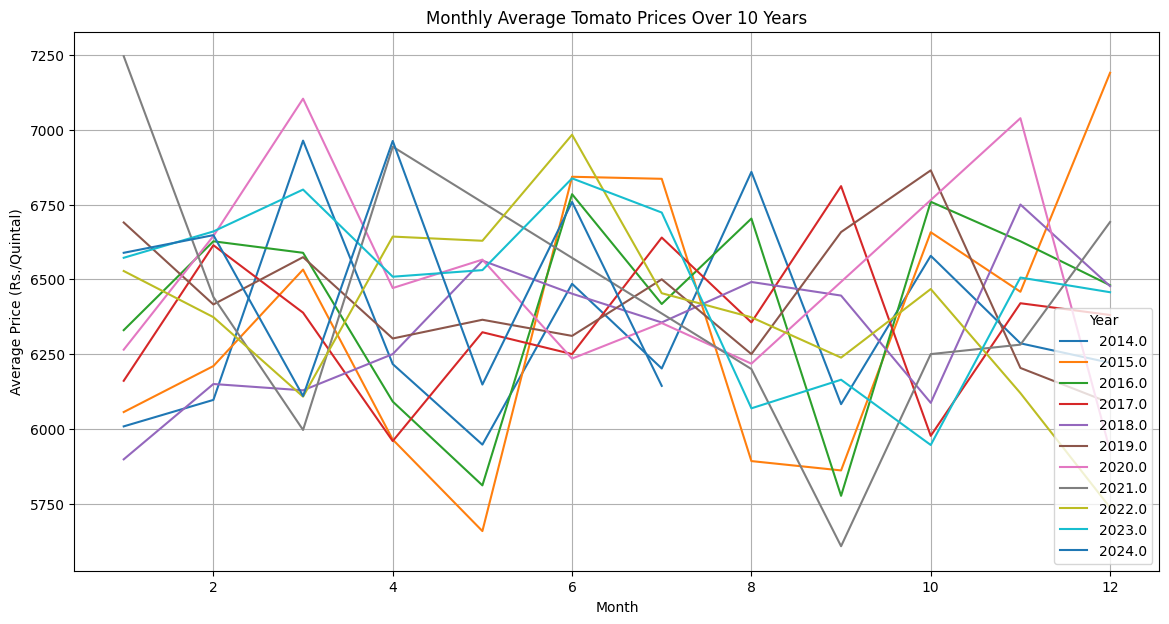

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for year in monthly_data['year'].unique():
    plt.plot(monthly_data[monthly_data['year'] == year]['month'], 
             monthly_data[monthly_data['year'] == year]['average_price'], label=year)

plt.xlabel('Month')
plt.ylabel('Average Price (Rs./Quintal)')
plt.title('Monthly Average Tomato Prices Over 10 Years')
plt.legend(title='Year')
plt.grid(True)
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_23284\1159717203.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_resampled = df.set_index('date')['average_price'].resample('M').mean()
C:\Users\harsh\AppData\Local\Temp\ipykernel_23284\1159717203.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_resampled = monthly_resampled.fillna(method='ffill')


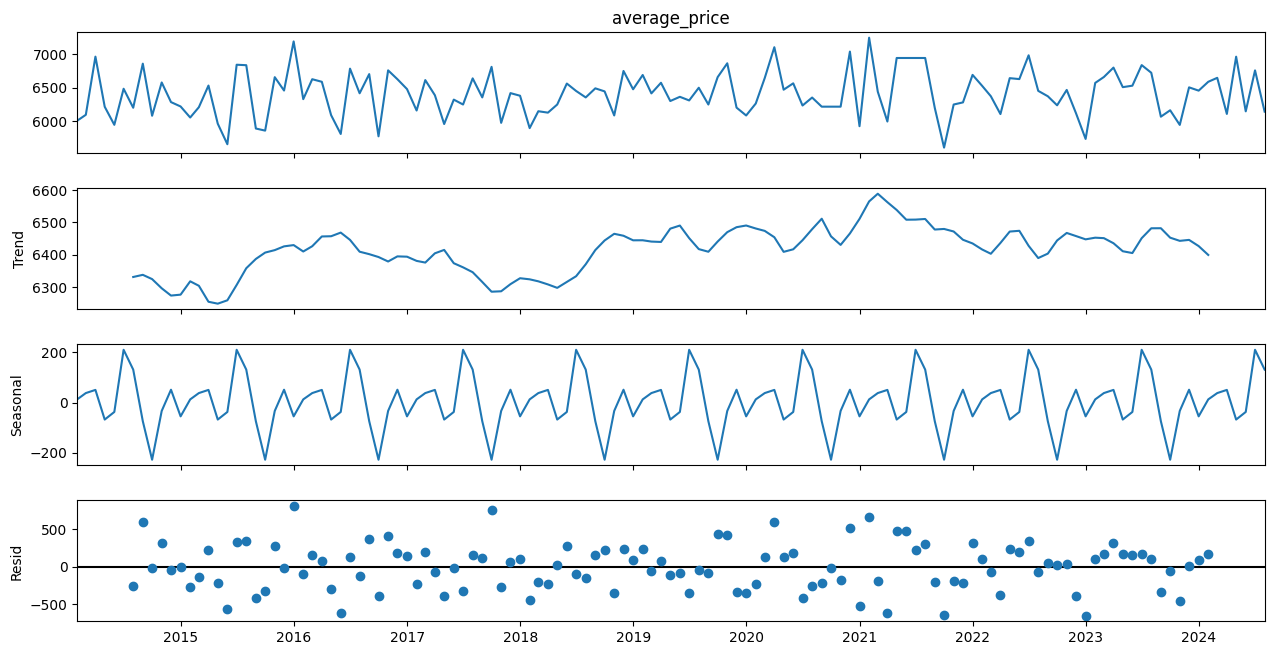

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Resample monthly average price
monthly_resampled = df.set_index('date')['average_price'].resample('M').mean()

# Fill missing values
monthly_resampled = monthly_resampled.fillna(method='ffill')

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_resampled, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()


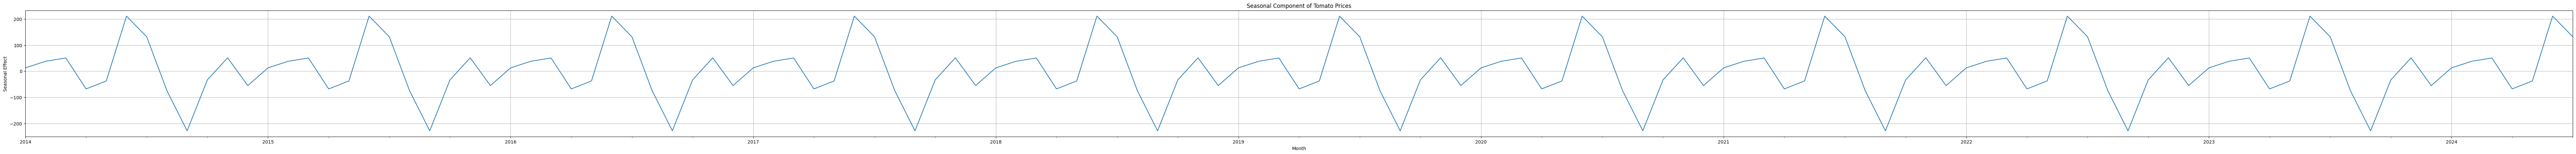

In [9]:
seasonal_component = decomposition.seasonal

# Plot the seasonal component
plt.figure(figsize=(100, 5))
seasonal_component.plot()
plt.title('Seasonal Component of Tomato Prices')
plt.xlabel('Month')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.show()
